In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define dataset directory
dataset_dir = "E:\Machine Learning\Image Classification\Tutorial_1\images" 

# Load dataset and split into training and validation
train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,  # 20% for validation/test
    subset="training",
    seed=123,  # Ensures reproducibility
    image_size=(150, 150),  # Resize images to 150x150
    labels="inferred",
    label_mode="int",
    batch_size=32
)

val_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    labels="inferred",
    label_mode="int",
    batch_size=32
)

class_names = train_ds.class_names
print("Class Names:", class_names)



Found 47 files belonging to 2 classes.
Using 38 files for training.
Found 47 files belonging to 2 classes.
Using 9 files for validation.
Class Names: ['cats', 'dogs']


In [5]:
def normalize(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

In [6]:
train_ds=train_ds.map(normalize)
val_ds=val_ds.map(normalize)

In [18]:
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Helps reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Helps reduce overfitting
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),  # Helps reduce overfitting
    layers.Dense(1, activation='sigmoid')  # Binary classification (dog vs cat)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Since it's a binary classification
              metrics=['accuracy'])

# Model summary
model.summary()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,838,721 (18.46 MB)

 Trainable params: 4,838,721 (18.46 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - accuracy: 0.4545 - loss: 0.8143 - val_accuracy: 0.4444 - val_loss: 0.7122
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5735 - loss: 0.9154 - val_accuracy: 0.4444 - val_loss: 0.7071
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7867 - loss: 0.6206 - val_accuracy: 0.4444 - val_loss: 0.7125
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5000 - loss: 0.7119 - val_accuracy: 0.4444 - val_loss: 0.7022
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4825 - loss: 0.6971 - val_accuracy: 0.4444 - val_loss: 0.6972
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4545 - loss: 0.6995 - val_accuracy: 0.4444 - val_loss: 0.6967
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6118 - loss: 0.6916 - val_accuracy: 0.4444 - val_loss: 0.6967
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.3777 - loss: 0.6990 - val_accuracy: 0.4444 - val_loss: 0.

In [20]:
import cv2

trial=cv2.imread("images/cats/cat20.jpg")

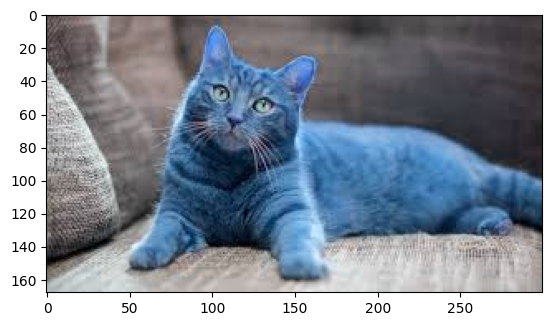

In [21]:
import matplotlib.pyplot as plt
plt.imshow(trial)

In [22]:
trial.shape

(168, 300, 3)

In [23]:
trial=cv2.resize(trial,(150,150))

In [24]:
trial_input=trial.reshape((1,150,150,3))

In [26]:
prediction=model.predict(trial_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [27]:
if prediction[0][0] > 0.5:
    print("It's a Dog 🐶")
else:
    print("It's a Cat 🐱")

It's a Cat 🐱
